## **Loading the Dataset**

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.inspection import PartialDependenceDisplay
import shap
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#import lime
#import lime.lime_tabular
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
df = pd.read_csv("corporate_rating.csv")

In [ ]:
df.head(10)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
5,AA,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/18/2014,Energy,1.741958,1.317156,0.220796,83.931968,...,0.252389,0.644841,5.574517,5.792278,1.767609,0.157246,9.833295,8.644788,0.230445,4.044776
6,AA,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,5/13/2014,Energy,1.939002,1.468909,0.256710,92.705452,...,0.270057,0.597160,4.417989,6.326531,1.700068,0.151173,12.140376,7.398337,0.216233,3.998076
7,A,Schlumberger N.V.,SLB,Egan-Jones Ratings Company,7/23/2015,Energy,1.905814,1.544791,0.197791,90.336857,...,0.258938,0.726292,5.047356,10.287293,1.908484,0.081212,15.264562,6.949487,0.248203,3.665200
8,AA,Honeywell International Inc.,HON,Egan-Jones Ratings Company,4/29/2014,Capital Goods,1.492419,1.129822,0.452859,74.102804,...,0.267923,0.781546,4.308240,10.291200,2.601191,0.138574,10.897998,5.512462,0.110997,5.482026
9,A,Honeywell International Inc.,HON,Moody's Investors Service,2/16/2016,Capital Goods,1.091557,0.850961,0.296935,76.394469,...,0.264045,0.803264,5.618107,9.692229,2.697369,0.170706,10.362903,6.994101,0.141365,4.793369


In [ ]:
df.tail(10)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
2019,B,IRSA Inversiones Y Representaciones S.A.,IRS,Standard & Poor's Ratings Services,12/17/2010,Consumer Services,0.887235,0.864677,0.053052,228.854889,...,0.261247,0.581794,0.378486,0.570860,2.344292,0.364089,12.241042,0.650550,0.284479,0.702238
2020,AA,"Gartner, Inc.",IT,Egan-Jones Ratings Company,2/18/2016,Consumer Services,0.862111,0.720623,0.281812,97.999541,...,0.354784,1.000000,4.121082,4.448027,-16.425121,0.125846,23.234839,4.121082,0.159756,2.164291
2021,B,SBA Communications Corporation,SBAC,Standard & Poor's Ratings Services,8/28/2013,Consumer Services,0.459629,0.266021,0.163323,19.955103,...,0.022877,0.660576,2.572565,0.998349,19.002336,-0.043850,22.537466,3.894427,0.381332,16.799152
2022,BB,Xperi Holding Corporation,XPER,Standard & Poor's Ratings Services,10/24/2016,Technology,3.919105,2.525982,1.286356,22.306532,...,0.381701,0.908152,2.688841,2.297457,2.336493,0.349489,22.822943,2.960782,0.561062,0.073164
2023,AA,Imperial Oil Limited,IMO,DBRS,10/7/2016,Energy,0.986608,0.886943,0.100695,26.994041,...,0.114157,0.467494,1.111373,1.676498,1.664762,0.089347,7.977219,2.377301,0.073664,0.000000
2024,BBB,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,147.599371,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608
2028,CCC,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,8/1/2014,Finance,1.085007,1.026375,0.203490,151.660513,...,0.266987,1.101462,2.487817,6.109814,3.939161,0.302997,9.604061,2.258650,0.252606,1.865682


## **Exploring the Data**

In [ ]:
print("Dataset Shape:",df.shape)

Dataset Shape: (2029, 31)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

In [ ]:
print("\nBasic Statistics:\n", df.describe())


Basic Statistics:
        currentRatio   quickRatio    cashRatio  daysOfSalesOutstanding  \
count   2029.000000  2029.000000  2029.000000             2029.000000   
mean       3.529607     2.653986     0.667364              333.795606   
std       44.052361    32.944817     3.583943             4447.839583   
min       -0.932005    -1.893266    -0.192736             -811.845623   
25%        1.071930     0.602825     0.130630               22.905093   
50%        1.493338     0.985679     0.297493               42.374120   
75%        2.166891     1.453820     0.624906               59.323563   
max     1725.505005  1139.541703   125.917417           115961.637400   

       netProfitMargin  pretaxProfitMargin  grossProfitMargin  \
count      2029.000000         2029.000000        2029.000000   
mean          0.278447            0.431483           0.497968   
std           6.064134            8.984982           0.525307   
min        -101.845815         -124.343612         -14.800817 

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Rating                                0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0
cashPerShare          

In [ ]:
unique_names_count = df['Name'].nunique()
print(unique_names_count)

593


In [ ]:
total_duplicates = df.duplicated(subset='Name').sum()
print(f"Total number of duplicate names: {total_duplicates}")

Total number of duplicate names: 1436


## **Visualize the Data**

In [8]:
# Create the crosstab of ratings by sector
sector_rating_crosstab = pd.crosstab(df['Rating'], df['Sector'])

# Display the crosstab to verify
print(sector_rating_crosstab)

Sector  Basic Industries  Capital Goods  Consumer Durables  \
Rating                                                       
A                     20             48                 11   
AA                     0              8                  0   
AAA                    0              0                  0   
B                     63             25                 11   
BB                    71             53                 26   
BBB                   99             89                 26   
C                      1              0                  0   
CC                     0              1                  0   
CCC                    6              9                  0   
D                      0              0                  0   

Sector  Consumer Non-Durables  Consumer Services  Energy  Finance  \
Rating                                                              
A                          53                 32      42       17   
AA                          7                  6

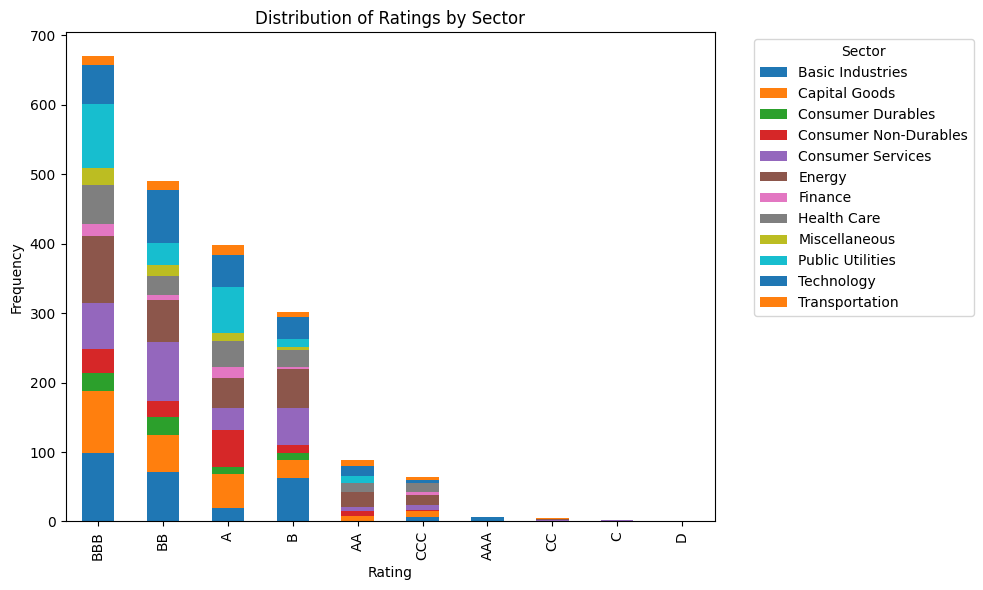

In [9]:
sector_rating_crosstab = sector_rating_crosstab.loc[sector_rating_crosstab.sum(axis=1).sort_values(ascending=False).index]
sector_rating_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Ratings by Sector')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [4]:
company_info = df[['Name', 'Symbol', 'Sector', 'Rating', 'Rating Agency Name', 'Date']]
liquidity_ratios = df[['currentRatio', 'quickRatio', 'cashRatio']]
profitability_ratios = df[['ebitPerRevenue', 'operatingCashFlowSalesRatio', 'freeCashFlowPerShare']]
efficiency_ratios = df[['daysOfSalesOutstanding', 'payablesTurnover']]
leverage_ratios = df[['companyEquityMultiplier']]
valuation_ratios = df[['enterpriseValueMultiple', 'cashPerShare']]
other_financial_metrics = df[['effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio', 'operatingCashFlowPerShare']]

def display_dataframes():
    display(company_info.head(), "Company Information")
    display(liquidity_ratios.head(), "Liquidity Ratios")
    display(profitability_ratios.head(), "Profitability Ratios")
    display(efficiency_ratios.head(), "Efficiency Ratios")
    display(leverage_ratios.head(), "Leverage Ratios")
    display(valuation_ratios.head(), "Valuation Ratios")
    display(other_financial_metrics.head(), "Other Financial Metrics")

display_dataframes()

,Name,Symbol,Sector,Rating,Rating Agency Name,Date
0,Whirlpool Corporation,WHR,Consumer Durables,A,Egan-Jones Ratings Company,11/27/2015
1,Whirlpool Corporation,WHR,Consumer Durables,BBB,Egan-Jones Ratings Company,2/13/2014
2,Whirlpool Corporation,WHR,Consumer Durables,BBB,Fitch Ratings,3/6/2015
3,Whirlpool Corporation,WHR,Consumer Durables,BBB,Fitch Ratings,6/15/2012
4,Whirlpool Corporation,WHR,Consumer Durables,BBB,Standard & Poor's Ratings Services,10/24/2016


'Company Information'

,currentRatio,quickRatio,cashRatio
0,0.945894,0.426395,0.099690
1,1.033559,0.498234,0.203120
2,0.963703,0.451505,0.122099
3,1.019851,0.510402,0.176116
4,0.957844,0.495432,0.141608


'Liquidity Ratios'

,ebitPerRevenue,operatingCashFlowSalesRatio,freeCashFlowPerShare
0,0.049351,0.058638,6.810673
1,0.048857,0.067239,8.625473
2,0.044334,0.074426,9.693487
3,-0.012858,0.028394,-1.015625
4,0.053770,0.058065,7.135348


'Profitability Ratios'

,daysOfSalesOutstanding,payablesTurnover
0,44.203245,3.906655
1,38.991156,4.002846
2,50.841385,3.483510
3,41.161738,4.581150
4,47.761126,3.857790


'Efficiency Ratios'

,companyEquityMultiplier
0,4.008012
1,3.156783
2,4.094575
3,3.630950
4,4.012780


'Leverage Ratios'

,enterpriseValueMultiple,cashPerShare
0,7.057088,9.809403
1,6.460618,17.402270
2,10.491970,13.103448
3,4.080741,14.440104
4,8.293505,14.257556


'Valuation Ratios'

,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,operatingCashFlowPerShare
0,0.202716,0.437551,15.565438
1,0.074155,0.541997,15.914250
2,0.214529,0.513185,18.888889
3,1.816667,-0.147170,6.901042
4,0.166966,0.451372,15.808147


'Other Financial Metrics'

Company Information

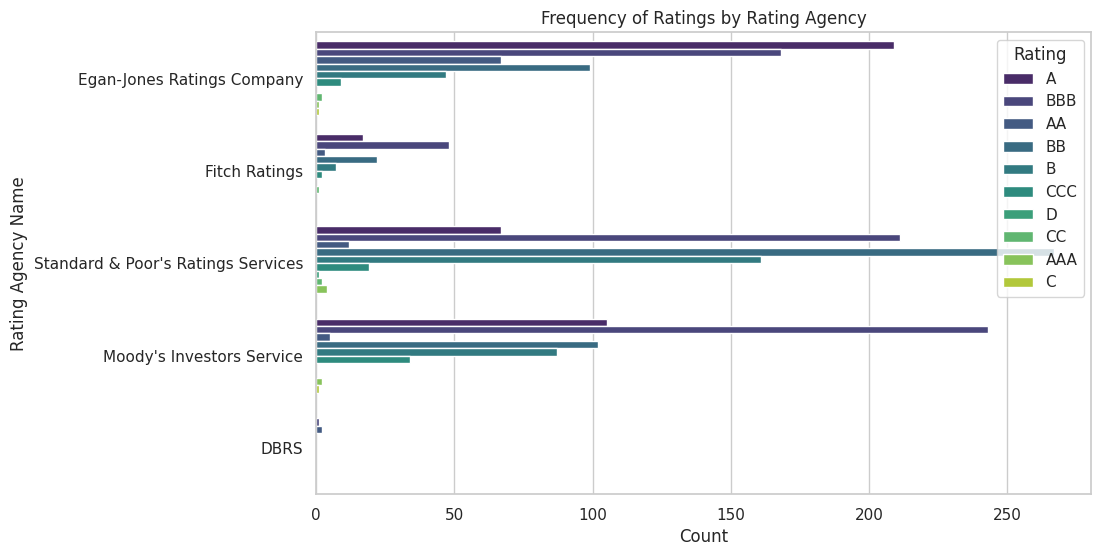

In [ ]:
sns.set(style="whitegrid")

def create_visualizations():
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Rating Agency Name', hue='Rating', data=company_info, palette='viridis')
    plt.title('Frequency of Ratings by Rating Agency')
    plt.xlabel('Count')
    plt.ylabel('Rating Agency Name')
    plt.legend(title='Rating')
    plt.show()



create_visualizations()


## **Data Cleaning**

### Outliers

In [ ]:
# Z-score
outlier_df = df.drop(['Rating','Name', 'Symbol','Rating Agency Name', 'Date', 'Sector'], axis =1)
z_scores = np.abs(stats.zscore(outlier_df))
outliers = np.where(z_scores > 3)

# Extract unique outlier row indices
outlier_indices = np.unique(outliers[0])

# Print outlier indices
print(f"Outlier indices: {outlier_indices}")

Outlier indices: [  15   18   33   49   70   75   98  157  178  184  185  186  187  188
  209  210  365  366  370  393  477  478  480  561  562  563  603  637
  642  643  644  651  740  741  750  751  752  820  830  831  891  892
  893  932  948  949  950 1003 1004 1005 1007 1010 1012 1021 1022 1044
 1094 1156 1159 1160 1162 1163 1164 1165 1171 1172 1185 1187 1207 1245
 1246 1247 1267 1316 1345 1347 1384 1408 1411 1412 1413 1432 1455 1457
 1458 1511 1567 1569 1582 1627 1657 1658 1659 1677 1682 1691 1706 1707
 1709 1728 1731 1741 1742 1743 1744 1832 1833 1834 1859 1862 1863 1864
 1865 1866 1867 1914 1996 2004 2026]


In [ ]:
# Drop the outlier rows
df_cleaned = df.drop(index=outlier_indices)

# Check the shape of the cleaned DataFrame
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Original shape: (2029, 31)
Cleaned shape: (1910, 31)


In [ ]:
df_cleaned

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,AA,Imperial Oil Limited,IMO,DBRS,10/7/2016,Energy,0.986608,0.886943,0.100695,26.994041,...,0.114157,0.467494,1.111373,1.676498,1.664762,0.089347,7.977219,2.377301,0.073664,0.000000
2024,BBB,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2027,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


In [ ]:
df_cleaned.drop(['Name','Symbol','Date'],  axis=1)

,Rating,Rating Agency Name,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Egan-Jones Ratings Company,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Egan-Jones Ratings Company,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Fitch Ratings,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Fitch Ratings,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Standard & Poor's Ratings Services,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,AA,DBRS,Energy,0.986608,0.886943,0.100695,26.994041,0.079147,0.089347,1.000000,...,0.114157,0.467494,1.111373,1.676498,1.664762,0.089347,7.977219,2.377301,0.073664,0.000000
2024,BBB,Moody's Investors Service,Capital Goods,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,Standard & Poor's Ratings Services,Capital Goods,2.962788,1.294743,0.428234,30.602414,-0.169983,-0.267117,0.198649,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2027,B,Fitch Ratings,Finance,0.911713,0.748356,0.310640,131.644566,0.087365,0.130692,0.414916,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


drop these column: name and symbol are identifies; date

### Preprocessing

In [ ]:
def preprocess_data(df_cleaned):
    # Identify numeric and categorical features
    numeric_features = df_cleaned.select_dtypes(include=['float64']).columns.tolist()
    categorical_features = ['Rating Agency Name', 'Sector']

    # Define the transformations for numeric and categorical data
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create the preprocessor with ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Separate features and target
    X = df_cleaned
    y = df_cleaned[['Rating']]

    # Preprocess the features
    X_preprocessed = preprocessor.fit_transform(X)

    # Get new feature names
    categorical_transformer_fit = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    all_feature_names = numeric_features + categorical_transformer_fit.tolist()
    X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)

    return X_preprocessed, X_preprocessed_df, y

In [ ]:
X_preprocessed, X_preprocessed_df, y = preprocess_data(df_cleaned)

### **Multilinearity**

In [ ]:
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=X_preprocessed_df.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_preprocessed_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_preprocessed_df.values, i) for i in range(X_preprocessed_df.shape[1])]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                              feature          VIF
0                                        currentRatio     1.925112
1                                          quickRatio     1.873866
2                                           cashRatio     2.201545
3                              daysOfSalesOutstanding     6.381702
4                                     netProfitMargin    21.531234
5                                  pretaxProfitMargin   306.094459
6                                   grossProfitMargin     1.862442
7                               operatingProfitMargin    99.553775
8                                      returnOnAssets     5.486749
9                             returnOnCapitalEmployed     4.810445
10                                     returnOnEquity     1.840703
11                                      assetTurnover     1.521044
12                                 fixedAssetTurnover     1.074404
13                                    debtEquityRatio  2597.99

Clean all the VIF > 10 by:
 Remove Highly Correlated Variables: Begin by examining the correlations between the independent variables. If two variables are highly correlated, consider removing one of them from the model.

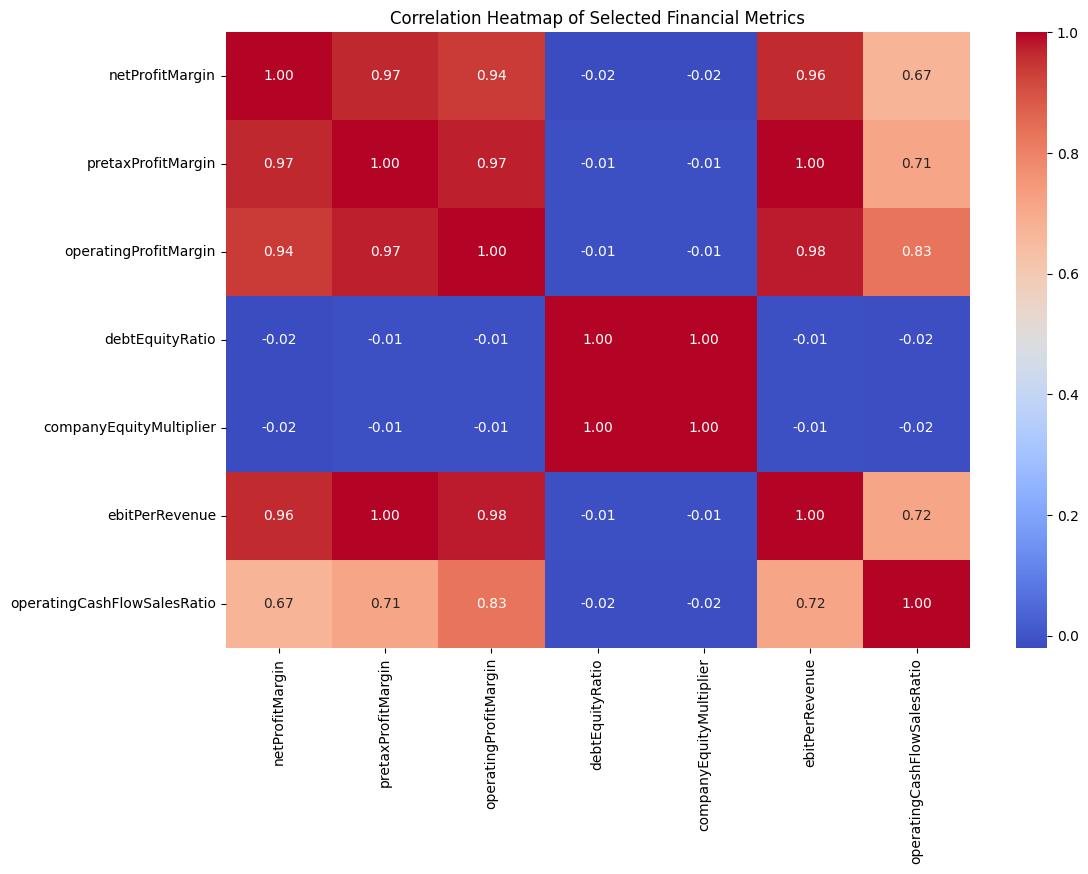

In [ ]:
# Select key financial metrics
multilinearity = ['netProfitMargin','pretaxProfitMargin', 'operatingProfitMargin',
                  'debtEquityRatio', 'companyEquityMultiplier', 'ebitPerRevenue', 'operatingCashFlowSalesRatio'
]

# Calculate the correlation matrix for the selected metrics
correlation_matrix = X_preprocessed_df[multilinearity].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title
plt.title('Correlation Heatmap of Selected Financial Metrics')

# Show the plot
plt.show()

In [ ]:
df_cleaned = df_cleaned.drop(['pretaxProfitMargin','operatingProfitMargin','companyEquityMultiplier',
                     'ebitPerRevenue'],  axis=1)

In [ ]:
X_preprocessed, X_preprocessed_df, y = preprocess_data(df_cleaned)

## **Modelling**

### **With no group**

In [ ]:
np.random.seed(42)

# Splitting the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Checking the shape of the splits
X_train.shape, X_test.shape

# Feature selection using RandomForestClassifier
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)
selected_features = X_preprocessed_df.columns[(selector.get_support())]
print("\nSelected features:")
print(selected_features)


Selected features:
Index(['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'grossProfitMargin', 'returnOnAssets',
       'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover',
       'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio',
       'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio',
       'freeCashFlowPerShare', 'cashPerShare', 'enterpriseValueMultiple',
       'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio',
       'payablesTurnover'],
      dtype='object')


In [ ]:
# Reducing the dataset to the selected features
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

In [ ]:
# Initialize dictionary to store results
results = {}

# Training and evaluating models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

    # Print evaluation results
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Displaying model comparison
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Logistic Regression:
Accuracy: 0.387434554973822
Precision: 0.3629531945045861
Recall: 0.387434554973822
F1 Score: 0.3508588642319005
Confusion Matrix:
[[30  0  0  0  3 55  0  0]
 [ 9  0  0  0  1  6  0  0]
 [ 1  0  0  0  0  1  0  0]
 [ 4  0  0  8 17 17  0  3]
 [ 8  0  1  3 17 55  0  0]
 [28  0  0  5 10 92  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 0  0  0  3  1  2  0  1]]
Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Random Forest:
Accuracy: 0.4607329842931937
Precision: 0.4569043659564464
Recall: 0.4607329842931937
F1 Score: 0.4480391079904606
Confusion Matrix:
[[34  2  0  1  4 47  0  0]
 [ 5  5  0  0  0  6  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0 16 20 13  0  0]
 [ 2  0  0 16 34 32  0  0]
 [24  1  0  4 18 87  0  1]
 [ 0  0  0  0  0  0  0  1]
 [ 0  0  0  3  1  3  0  0]]
Training Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Gradient Boosting:
Accuracy: 0.418848167539267
Precision: 0.4124829555806793
Recall: 0.418848167539267
F1 Score: 0.4074014138294105
Confusion Matrix:
[[34  3  0  1  6 43  0  0  1]
 [ 7  4  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  2  0  0  0]
 [ 1  0  0 13 24 10  0  0  1]
 [ 3  1  0 14 25 38  1  0  2]
 [27  0  1  3 17 84  0  0  3]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  1  0  2  3  1  0  0  0]]
Training SVM...

SVM:
Accuracy: 0.387434554973822
Precision: 0.35416771947623
Recall: 0.387434554973822
F1 Score: 0.3153737460607082
Confusion Matrix:
[[ 11   0   0   0   1  76   0   0]
 [  5   0   0   0   0  11   0   0]
 [  0   0   0   0   0   2   0   0]
 [  1   0   0  10  17  21   0   0]
 [  2   0   0   5  13  64   0   0]
 [ 13   0   0   1   7 114   0   0]
 [  0   0   0   1   0   0   0   0]
 [  0   0   0   2   4   1   0   0]]

Model Comparison:
                     accuracy  precision    recall  f1_score
Logistic Regression  0.387435   0.362953  0.387435  0.350859
Rando

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Groupings**

In [ ]:
# Define class boundaries
rating_mapping = {
    'AAA': 2, 'AA': 2, 'A': 2,
    'BBB': 1, 'BB': 1, 'B': 1,
    'CCC': 0, 'CC': 0, 'C': 0,
    'D': 0,
}

df_cleaned['Rating'] = df_cleaned['Rating'].map(rating_mapping)

In [ ]:
df_cleaned

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,2,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,3.008012,0.750500,0.202716,0.437551,6.810673,9.809403,7.057088,15.565438,0.058638,3.906655
1,1,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,2.156783,0.683222,0.074155,0.541997,8.625473,17.402270,6.460618,15.914250,0.067239,4.002846
2,1,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,3.094575,0.755774,0.214529,0.513185,9.693487,13.103448,10.491970,18.888889,0.074426,3.483510
3,1,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,2.630950,0.724590,1.816667,-0.147170,-1.015625,14.440104,4.080741,6.901042,0.028394,4.581150
4,1,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,3.012780,0.750796,0.166966,0.451372,7.135348,14.257556,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2,Imperial Oil Limited,IMO,DBRS,10/7/2016,Energy,0.986608,0.886943,0.100695,26.994041,...,0.664762,0.399313,0.114157,0.467494,1.111373,1.676498,7.977219,2.377301,0.073664,0.000000
2024,1,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.759461,0.431644,0.343500,0.953231,50.293155,230.194971,15.867701,52.760726,0.083018,15.758348
2025,1,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,...,0.614282,0.380530,0.363636,0.602645,5.563630,5.958956,-4.729967,9.232021,0.114089,14.542373
2027,1,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,...,1.917192,0.501115,0.331525,0.692804,0.744377,1.470201,22.440102,1.074441,0.217783,1.997608


In [ ]:
X_preprocessed, X_preprocessed_df, y = preprocess_data(df_cleaned)

In [ ]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Feature selection using RandomForestClassifier
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)
selected_features = X_preprocessed_df.columns[(selector.get_support())]
print("\nSelected features:")
print(selected_features)

# Reducing the dataset to the selected features
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}




Selected features:
Index(['currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'grossProfitMargin', 'returnOnAssets',
       'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover',
       'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio',
       'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio',
       'freeCashFlowPerShare', 'cashPerShare', 'enterpriseValueMultiple',
       'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio',
       'payablesTurnover', 'Rating Agency Name_Egan-Jones Ratings Company'],
      dtype='object')


### **Class Weight**

In [ ]:
total_samples = len(y_train)
num_classes = len(np.unique(y_train))
weights = {class_label: total_samples / (num_classes * np.count_nonzero(y_train == class_label))
           for class_label in np.unique(y_train)}

print("Manually computed class weights:", weights)

# Use these weights for training model
sample_weights = np.array([weights[cls] for cls in y_train['Rating']])

Manually computed class weights: {0: 10.836879432624114, 1: 0.45968712394705175, 2: 1.3655049151027703}


In [ ]:
# Initialize dictionary to store results
results = {}

# Training and evaluating models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train, sample_weight=sample_weights)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

    # Print evaluation results
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Displaying model comparison
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Training Logistic Regression...

Logistic Regression:
Accuracy: 0.5392670157068062
Precision: 0.7336540546651126
Recall: 0.5392670157068062
F1 Score: 0.5693636479047905
ROC AUC Score: 0.7612778087904221
Confusion Matrix:
[[  7   1   0]
 [ 56 116  96]
 [  5  18  83]]
Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Random Forest:
Accuracy: 0.7801047120418848
Precision: 0.758364296571525
Recall: 0.7801047120418848
F1 Score: 0.7533034156070805
ROC AUC Score: 0.8517563950418182
Confusion Matrix:
[[  0   8   0]
 [  0 252  16]
 [  0  60  46]]
Training Gradient Boosting...

Gradient Boosting:
Accuracy: 0.743455497382199
Precision: 0.7600032219089812
Recall: 0.743455497382199
F1 Score: 0.7495409395272151
ROC AUC Score: 0.8060726263522509
Confusion Matrix:
[[  1   7   0]
 [  8 209  51]
 [  1  31  74]]
Training SVM...

SVM:
Accuracy: 0.6230366492146597
Precision: 0.7304789721502167
Recall: 0.6230366492146597
F1 Score: 0.649047889640484
ROC AUC Score: 0.7752188083896319
Confusion Matrix:
[[  4   4   0]
 [ 33 154  81]
 [  1  25  80]]

Model Comparison:
                     accuracy  precision    recall  f1_score   roc_auc
Logistic Regression  0.539267   0.733654  0.539267  0.569364  0.761278
Random Forest        0.780105   0.758364  0.780105  0.753303  0.851756
Gradient Boosting    0.743455   0.760003  0.7

  0%|          | 0/100 [00:00<?, ?it/s]

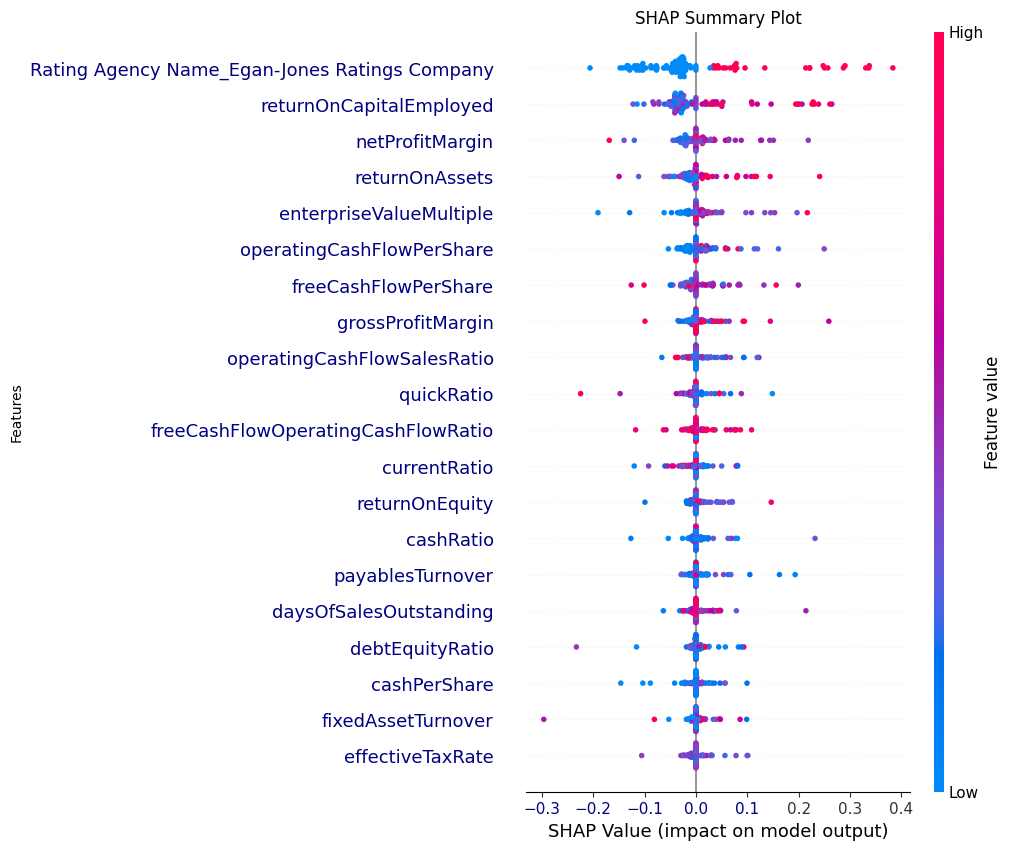

In [ ]:
# Choosing the best model for interpretability analysis
best_model_name = results_df['roc_auc'].idxmax()
best_model = models[best_model_name]
best_model.fit(X_train, y_train)


# Randomly sample 100 indices from X_test
sample_indices = np.random.choice(X_test.shape[0], size=100, replace=False)
X_test_sample = X_test[sample_indices]
sample = shap.sample(X_train, 100)
explainer = shap.KernelExplainer(best_model.predict, sample)
# SHAP values for interpretability
shap_values = explainer.shap_values(X_test_sample, nsamples=100)

# SHAP summary plot
shap.summary_plot(shap_values, features=X_test_sample, feature_names=selected_features, show=False, plot_type='dot')

# Further customize the plot
plt.title('SHAP Summary Plot', color='black')  # Set title and text color
plt.xlabel('SHAP Value (impact on model output)', color='black')
plt.ylabel('Features', color='black')

# Adjust text color of the x and y ticks
plt.xticks(color='navy')  # Change x tick colors
plt.yticks(color='navy')  # Change y tick colors

# Adjust subplot parameters to give more space for labels if necessary
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)

plt.show()

Training Logistic Regression...


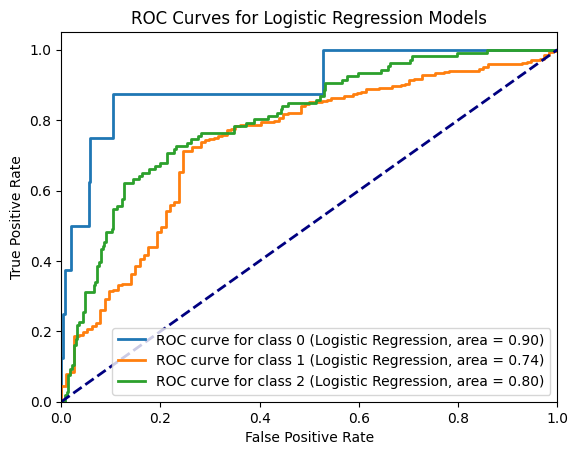

Training Random Forest...


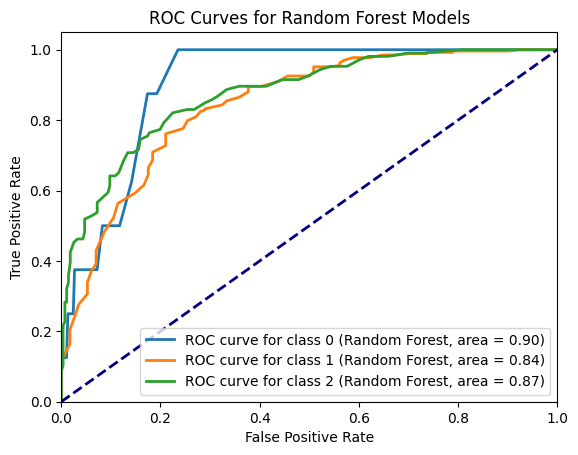

Training Gradient Boosting...


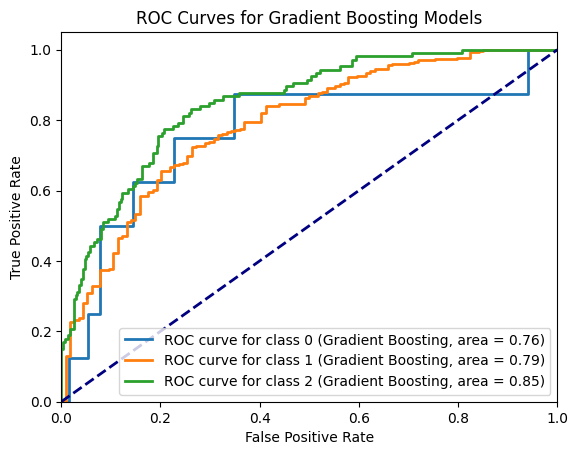

Training SVM...


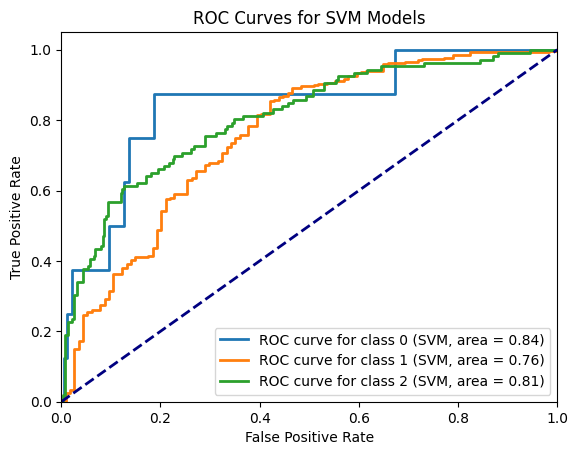

In [ ]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train, sample_weight=sample_weights)

    # Make predictions
    y_prob = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_test == model.classes_[i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {model.classes_[i]} ({name}, area = {roc_auc:.2f})')

    #Plot the random guessing line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Set plot labels and title
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {name} Models')
    plt.legend(loc="lower right")
    plt.show()

Training Logistic Regression...
Logistic Regression does not support feature importances.
Training Random Forest...


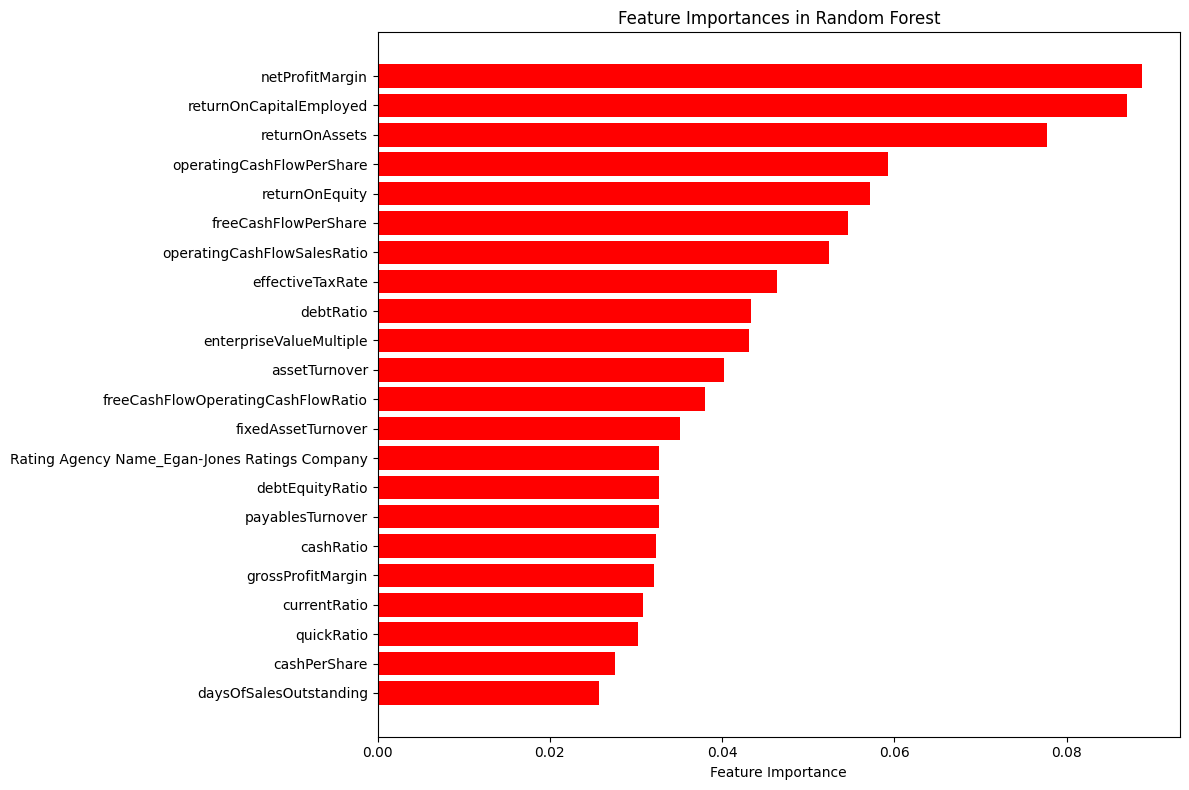

Training Gradient Boosting...


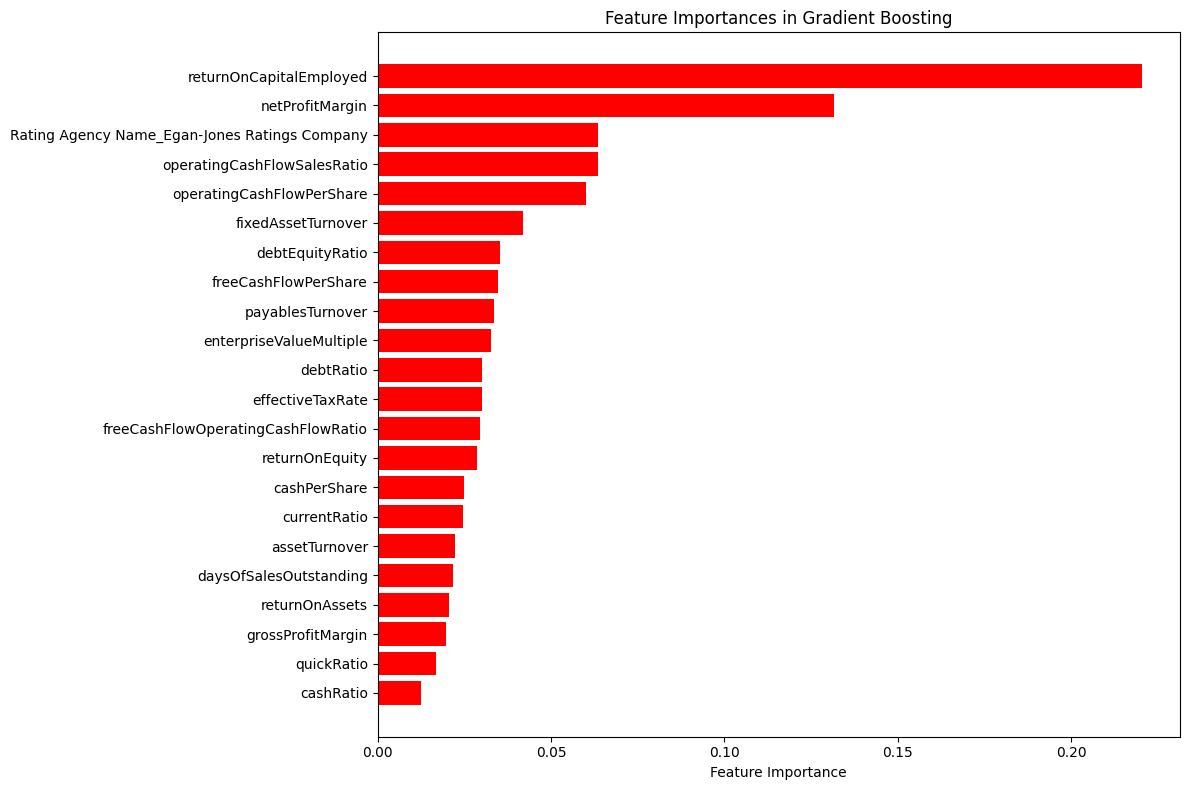

Training SVM...
SVM does not support feature importances.


In [ ]:
# Assuming models is a dictionary containing (name, model) pairs
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train, sample_weight=sample_weights)

    # If the model has feature_importances_ attribute (like Random Forest)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = importances.argsort()[::-1]

        # Plot feature importances for the current model
        plt.figure(figsize=(12, 8))
        plt.title(f"Feature Importances in {name}")

        # Plot horizontal bar chart
        plt.barh(range(X_train.shape[1]), importances[indices], color="r", align="center")

        # Customize ticks and labels
        plt.yticks(range(X_train.shape[1]), selected_features[indices])
        plt.xlabel('Feature Importance')
        plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top

        # Adjust layout to prevent clipping of labels
        plt.tight_layout()

        # Show plot
        plt.show()
    else:
        print(f"{name} does not support feature importances.")


In [ ]:
# Define your parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'class_weight': ['balanced'],
    'max_depth': [None, 10, 20, 30]
}
#Perform Grid Search CV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1_weighted')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

In [ ]:
print(f'Best Parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Random Forest Test Set Accuracy: {grid_search_rf.best_estimator_.score(X_test, y_test)}')

Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 100}
Random Forest Test Set Accuracy: 0.806282722513089


In [ ]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
}
# Perform Grid Search CV for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='f1_weighted')
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_


In [ ]:
print(f'Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}')
print(f'Gradient Boosting Test Set Accuracy: {grid_search_gb.best_estimator_.score(X_test, y_test)}')

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Gradient Boosting Test Set Accuracy: 0.8010471204188482
